In [1]:
%load_ext autoreload
%autoreload 2

#### Introduction

Simpletorch is a deep learning library that is inspired by PyTorch. The library provides an API that is quite similar to the one used in PyTorch. Using Simpletorch, you can define a multilayer perceptron using a syntax that is similar to the one used in PyTorch. This notebook will show you how to use Simpletorch's API to train a multilayer perceptron on MNIST dataset.

#### Import libraries

In [2]:
from Simpletorch import datasets
import Simpletorch.tensor as tensor
import matplotlib.pyplot as plt
from Simpletorch.module import Network
from Simpletorch.module import Linear
from Simpletorch.module.Activation import ReLU,Sigmoid
from Simpletorch.module.Loss import CrossEntropyWithLogits,HingeLoss
from Simpletorch.optimizer import SGD
from Simpletorch.trainer.mlptrainer import MLPTrainer
from Simpletorch.simplegrad import function

import numpy as np


In [3]:
np.random.seed(1)

#### Load the MNIST dataset


In [4]:
#The library provides an api call to download and load  the dataset
train_x,train_y, test_x, test_y =  datasets.load_mnist_dataset()

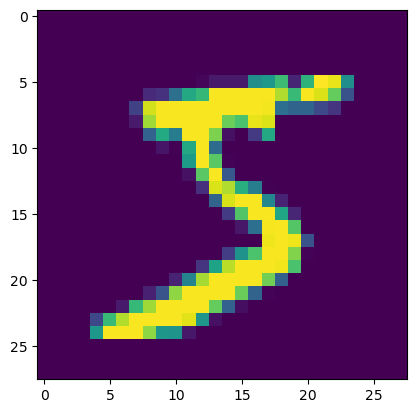

In [5]:
#visaulize the data
plt.imshow(train_x[0].reshape(28,28))

### Preprocessing Steps:
- One hot encoding of labels
- Normalize pixel values
- Split Train dataset into Train/val

In [6]:
# One hot encoding of labels
train_y = np.eye(10)[train_y]
test_y = np.eye(10)[test_y]

In [7]:
# Pixel value range is normalize to be in [0,1] 
train = train_x/255.0
test = test_x/255.0

In [8]:
# split the train dataset into training 
train_x, val_x, train_y, val_y= datasets.split_train_val(train, train_y, split_ratio=0.9,seed=1)

In [9]:
# Create dataloader object for training, validation and testing. 
# The batch size could be change with batch_size parameter.
# If shuffle is True, the batches will be randomized after each epoch.
train_loader =  datasets.Dataloader(train_x, train_y, shuffle= True, batch_size=64)
val_loader  = datasets.Dataloader(val_x,val_y,shuffle=True, batch_size=64 )
test_loader =  datasets.Dataloader(test_x, test_y,shuffle=False,batch_size=64)

#### Building models
The library provides quick method for creating multi-layer perceptron model with *MLP* class.  We can import **MLP** class from the module package which will can create MLP model. The MLP can be intialized with the given input size, list of hidden layer sizes, output size, activation function, and initialization method. The activation function can be either **ReLU** or **Sigmoid**. The initialization method can be either **normal** or **zeros**. 

In [14]:
#import the module
from Simpletorch.module import MLP
# Example 1:
# Create model with 2 hidden layers of size 10,20.
# Default activation is ReLU. 
# Default intialization is normal weights.
example1 = MLP(input_size=784, hidden_sizes=[20,10,1],output_size=10)
print(example1)


layer0 : Linear(784,20)
activation0 : ReLU
layer1 : Linear(20,10)
activation1 : ReLU
layer2 : Linear(10,1)
activation2 : ReLU
layer3 : Linear(1,10)


In [11]:

# Example 2:
# Create model with 2 hidden layers of size 10,20.
# Activation is Sigmoid. 
# Intialization is zeros weight initialization.

example2 = MLP(input_size=784, hidden_sizes=[10,20],output_size=10, activation_fn='Sigmoid', initialization='zeros')
print(example2)

layer0 : Linear(784,10)
activation0 : Sigmoid
layer1 : Linear(10,20)
activation1 : Sigmoid
layer2 : Linear(20,10)


The Library also provide further flexiblity to further define your own class to create a Model similar to Pytorch's API.
To create a model, create a subclass of **Network** class. In the \__init__ fucntion we define the layers needed for the Architectures. We also initialize network parameters. 
The **forward** method of class defines how the input is propagated in the forward pass of the model. 

In [17]:
class Example3(Network):
      def __init__(self,input,hidden_size, output) -> None:
            '''
            Args:
            input : int  
                  number of input feature dimension
            hidden_size : int 
                  number of dimension in hidden layer
            output : int
                  number of output feature dimesions
            '''
            # intialize base class
            super().__init__()
           
            # Input layer
            self.l1 = Linear(input,hidden_size)
            # Sigmoid Activation
            self.s1 = Sigmoid()
            # Final layer
            self.l2 = Linear(hidden_size, output)
            # Sigmoid output
            self.s2 = Sigmoid()
           
            # initialize zero weights to Linear layer
            self.l1.init_zeros()
            self.l2.init_zeros()

      def  forward(self, x):
            # Define forward pass for the model
            out = self.l1(x)
            out = self.s1(out)
            out = self.l2(out)
            out = self.s2(out)
            return out
#Create model object
example3 =  Example3(784,128,10)
print(example3)

l1 : Linear(784,128)
s1 : Sigmoid
l2 : Linear(128,10)
s2 : Sigmoid


#### Training Models

To train the MLP model, the library provides **MLPTrainer** class. To intialize it we need to pass model,optimizer, loss function, dataloaders for training and validation, and total number of epochs.
Supported optimization algorithm is Stochastic gradient descent.
The following loss function are supported:
- Cross Entropy Loss 
- Binary Cross entropy Loss
- Mean Squred Error Loss
- Hinge Loss

##### Training with Cross Entropy Loss on MNIST dataset

In [20]:
np.random.seed(1)
model1= MLP(784,[512,256,128],10,activation_fn='ReLU')
print(model1)
criterion = CrossEntropyWithLogits()
optimizer = SGD(model1.parameters(),lr=0.0001)
trainer = MLPTrainer(train_loader, val_loader, model=model1, criterion=criterion, optimizer=optimizer,epochs=70)

layer0 : Linear(784,512)
activation0 : ReLU
layer1 : Linear(512,256)
activation1 : ReLU
layer2 : Linear(256,128)
activation2 : ReLU
layer3 : Linear(128,10)


In [21]:
trainer.train()

Epoch#:0|| training_results:[loss:1051.5620, accuracy:0.7501 ]|| validation_results:[loss:480.8291, accuracy:0.8280]
Epoch#:1|| training_results:[loss:348.9138, accuracy:0.8505 ]|| validation_results:[loss:302.0873, accuracy:0.8560]
Epoch#:2|| training_results:[loss:230.7404, accuracy:0.8693 ]|| validation_results:[loss:232.8711, accuracy:0.8617]
Epoch#:3|| training_results:[loss:173.9249, accuracy:0.8814 ]|| validation_results:[loss:192.3925, accuracy:0.8720]
Epoch#:4|| training_results:[loss:137.9845, accuracy:0.8894 ]|| validation_results:[loss:164.9810, accuracy:0.8748]
Epoch#:5|| training_results:[loss:115.4663, accuracy:0.8936 ]|| validation_results:[loss:151.2439, accuracy:0.8703]
Epoch#:6|| training_results:[loss:98.0905, accuracy:0.8988 ]|| validation_results:[loss:130.4359, accuracy:0.8788]
Epoch#:7|| training_results:[loss:85.4445, accuracy:0.9025 ]|| validation_results:[loss:126.0531, accuracy:0.8815]
Epoch#:8|| training_results:[loss:75.7970, accuracy:0.9039 ]|| validation

KeyboardInterrupt: 

The trainer stores the  loss and accuracy as metrics during training and validation. They can be plotted as follows:

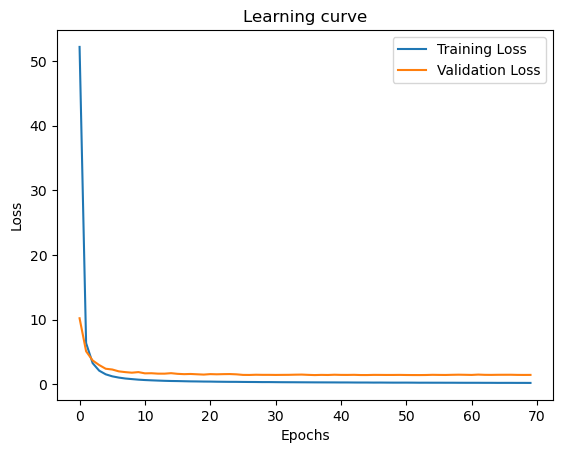

In [22]:

plt.plot([ metric.loss for metric in trainer.training_results], label = 'Training Loss')
plt.plot([ metric.loss for metric in  trainer.validation_results],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning curve')
plt.legend()
plt.show()


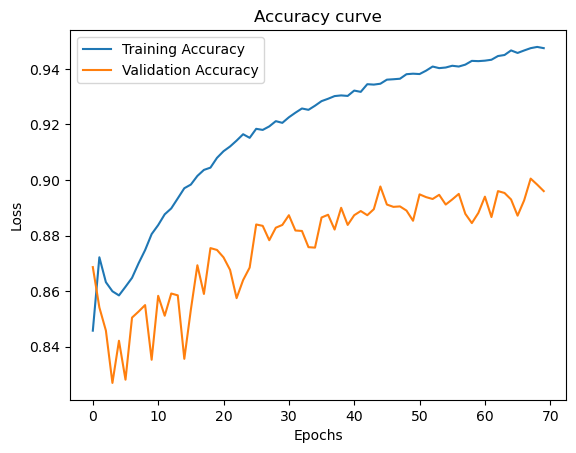

In [23]:
plt.plot([ metric.accuracy for metric in trainer.training_results], label = 'Training Accuracy')
plt.plot([ metric.accuracy for metric in  trainer.validation_results],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy curve')
plt.legend()
plt.show()

### Training 2-layer model with HingeLoss

In [15]:
# 3 layer model
np.random.seed(1)
model2= MLP(784,[512,256],10,activation_fn='ReLU')
print(model2)
criterion = HingeLoss()
optimizer = SGD(model2.parameters(),lr=0.01)
trainer2 = MLPTrainer(train_loader, val_loader, model=model2, criterion=criterion, optimizer=optimizer,epochs=70)

layer0 : Linear(784,512)
activation0 : ReLU
layer1 : Linear(512,256)
activation1 : ReLU
layer2 : Linear(256,10)


In [16]:
trainer2.train()

Epoch#:0|| training_results:[loss:134.5712, accuracy:0.7681 ]|| validation_results:[loss:6.4902, accuracy:0.6860]


KeyboardInterrupt: 

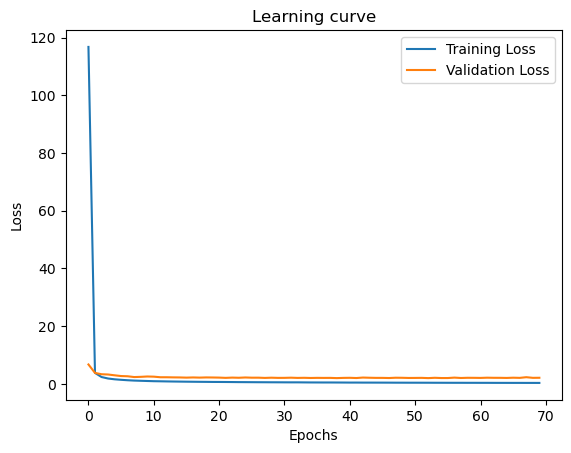

In [27]:
plt.plot([ metric.loss for metric in trainer2.training_results], label = 'Training Loss')
plt.plot([ metric.loss for metric in  trainer2.validation_results],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning curve')
plt.legend()
plt.show()

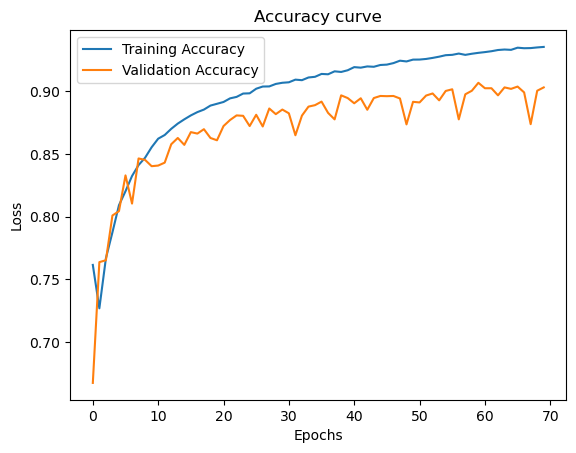

In [28]:
plt.plot([ metric.accuracy for metric in trainer2.training_results], label = 'Training Accuracy')
plt.plot([ metric.accuracy for metric in  trainer2.validation_results],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy curve')
plt.legend()
plt.show()

In [66]:
def plot_images(images, labels,  num,predictions):
    num_col= num//2
    num_row = num//num_col
    predicted_label =np.argmax(predictions,axis=1)
    _, axes = plt.subplots(num_row, num_col)
    for i in range(num):
        ax = axes[i//num_col, i%num_col]
        ax.set_axis_off()
        ax.imshow(images[i].reshape(28,28), cmap='gray')
        title = f'Actual: {labels[i]} \n Prediction:{predicted_label[i]},{predictions[i,predicted_label[i]]:.2f}'
        ax.set_title(title,fontsize=8)
    plt.tight_layout()
    plt.show()

def visualize_predictions(model):
    num = 10
    #select 10 random images
    indices = np.random.choice(len(test_x),num)
    X, Y = test_x[indices], test_y[indices]
    # get actual label from one hot encoding
    labels = np.argmax(Y,axis=1)
    # get predictions
    predictions = model(tensor.Tensor(X))
    # apply softmax to get confidence
    predictions = function.softmax()(predictions.data)
    # plot results
    plot_images(X,labels=labels, num=num,predictions=predictions)

def visualize_incorrect(model):
    num = 10
    #select 10 random images
    indices = np.random.choice(len(test_x),num)
    X, Y = test_x, test_y
    # get actual label from one hot encoding
    labels = np.argmax(Y,axis=1)
    # get predictions
    predictions = model(tensor.Tensor(X))
    # apply softmax to get confidence
    predictions = function.softmax()(predictions.data)
    predicted_label =np.argmax(predictions,axis=1)
    # plot results]
    incorrect_x = X[ predicted_label !=labels]
    incorrect_y = labels[predicted_label != labels]
    incorrect_predictions = predictions[predicted_label!=labels]
    plot_images(incorrect_x[:num],labels=incorrect_y[:num], num=num,predictions=incorrect_predictions[:num])

### Test Evaluation 

In [38]:
# Test evaluation for model1
from Simpletorch.metrics import calc_accuracy, per_class_accuracy

# print accuracy on test dataset for model1
calc_accuracy(model=model1, test_loader=test_loader)
# print classwise accuracy for model1
per_class_accuracy(model=model1, test_loader=test_loader)



Accuracy of the network on the 10000 test images: 90 %
Accuracy for class: 0 is 93.1 %
Accuracy for class: 1 is 95.6 %
Accuracy for class: 2 is 85.6 %
Accuracy for class: 3 is 89.5 %
Accuracy for class: 4 is 88.6 %
Accuracy for class: 5 is 86.2 %
Accuracy for class: 6 is 92.9 %
Accuracy for class: 7 is 92.0 %
Accuracy for class: 8 is 86.9 %
Accuracy for class: 9 is 89.6 %


In [34]:
# print accuracy on test dataset for model2
calc_accuracy(model=model2, test_loader=test_loader)
# print classwise accuracy for model2
per_class_accuracy(model=model2, test_loader=test_loader)

Accuracy of the network on the 10000 test images: 88 %
Accuracy for class: 0 is 93.0 %
Accuracy for class: 1 is 95.5 %
Accuracy for class: 2 is 75.9 %
Accuracy for class: 3 is 91.0 %
Accuracy for class: 4 is 89.4 %
Accuracy for class: 5 is 81.9 %
Accuracy for class: 6 is 92.9 %
Accuracy for class: 7 is 88.8 %
Accuracy for class: 8 is 85.7 %
Accuracy for class: 9 is 93.1 %


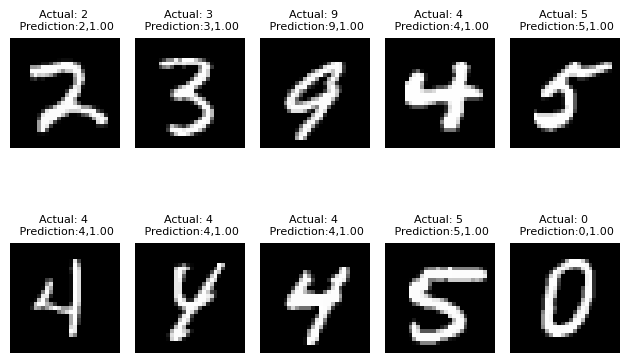

In [41]:
# visualaize testing with model1
visualize_predictions(model1)

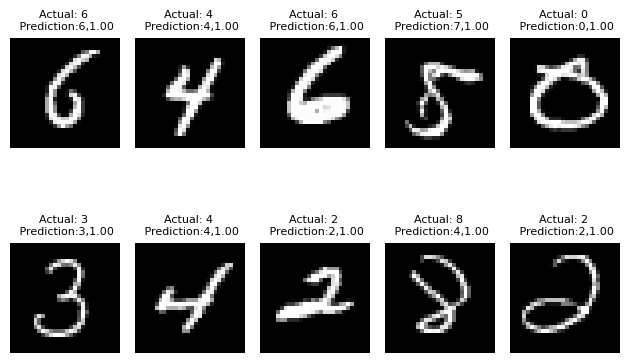

In [42]:
# Visualize testing with model2
visualize_predictions(model2)

### Visualize Incorrect Predictions

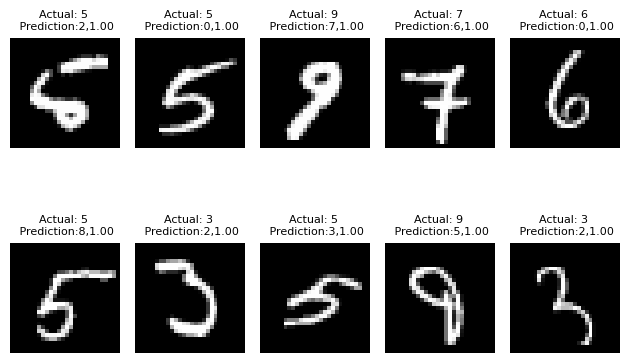

In [67]:
# Predictions for Model1
visualize_incorrect(model1)

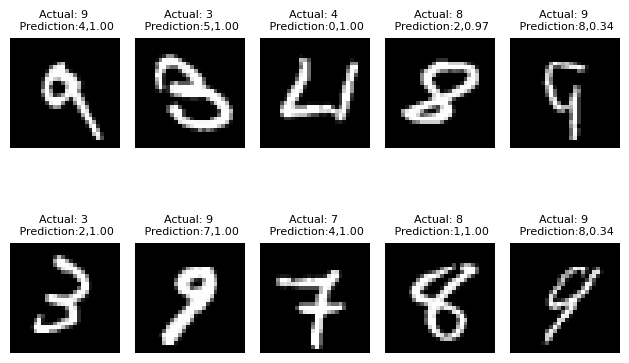

In [68]:
# Predictions for model2
visualize_incorrect(model2)

### Conclusions

So, by using the library we could create MLP with required number of input, hidden and output sizes. Along with crossentropy loss, hinge loss, the library also mean squared loss. For the MNIST dataset, model trained with crossentropy loss had 90% test accuracy while the model with hinge loss had 88%. For both models the accuracy while predicting class 2 was the lowest.  Further imporvements could done increasing training time, increasing model complexity, support better initialzation such as Xavier initialization and add new layers like batchnorm.